### **Project Introduction**
This project aims to develop a machine learning model to predict whether a person's income exceeds $50K/year based on census data. The dataset contains various demographic and employment-related features that we'll analyze, preprocess, and use to build our predictive model.

Our approach will follow these key steps:

- Data collection and preparation

- Exploratory data analysis

- Data preprocessing and feature engineering

- Model development and evaluation

- Insights and recommendations

## **Step 1**
### **Data collection and preparation**

In [62]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from matplotlib import gridspec
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Model evaluation
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, roc_auc_score, confusion_matrix, 
                            roc_curve, auc, classification_report)
from sklearn.model_selection import RandomizedSearchCV

# Feature engineering
from sklearn.decomposition import PCA

# Save model
import joblib

# Set style for plots
sns.set_style('whitegrid')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
file = 'income_data.csv'
df = pd.read_csv(file)

# Display first few rows
df.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [3]:
# Check data types and missing values
print("\nData Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Summary statistics for numerical features
print("\nSummary Statistics:")
df.describe().T


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None

Missing Values:
age                 0
workclass         963
fnlwgt         

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


### **Initial Observations:**
- The dataset contains 15 columns with a mix of numerical and categorical features

- Some columns like 'workclass', 'occupation', and 'native-country' have missing values represented by '?'

- The target variable is 'income' with values '<=50K' and '>50K'

- Some categorical variables need to be encoded

- Numerical features have different scales and may need normalization

In [4]:
# Replace '?' with NaN for proper missing value handling
df.replace('?', np.nan, inplace=True)

# Drop fnlwgt column as it's not relevant for prediction
df.drop('fnlwgt', axis=1, inplace=True)

# Fill missing categorical values with mode
for col in ['workclass', 'occupation', 'native-country']:
    df.fillna({col: df[col].mode()[0]}, inplace=True)

# Convert target variable to binary (0 for <=50K, 1 for >50K)
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

# Check cleaned data
print("\nCleaned Data Info:")
print(df.info())


Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      48842 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  48842 non-null  object
 13  income          48842 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 5.2+ MB
None


## **Step 2**
### **Exploratory data analysis [EDA]**

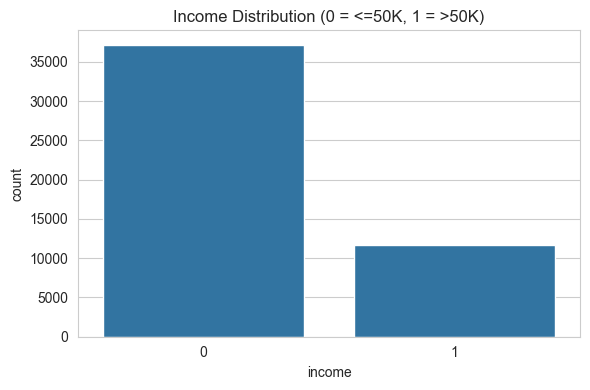

Income Ratio:
income
0    76.071823
1    23.928177
Name: proportion, dtype: float64


In [5]:
# Plot income distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='income', data=df)
plt.title('Income Distribution (0 = <=50K, 1 = >50K)')
plt.tight_layout()
plt.show()

income_ratio = df['income'].value_counts(normalize=True)*100
print(f"Income Ratio:\n{income_ratio}")

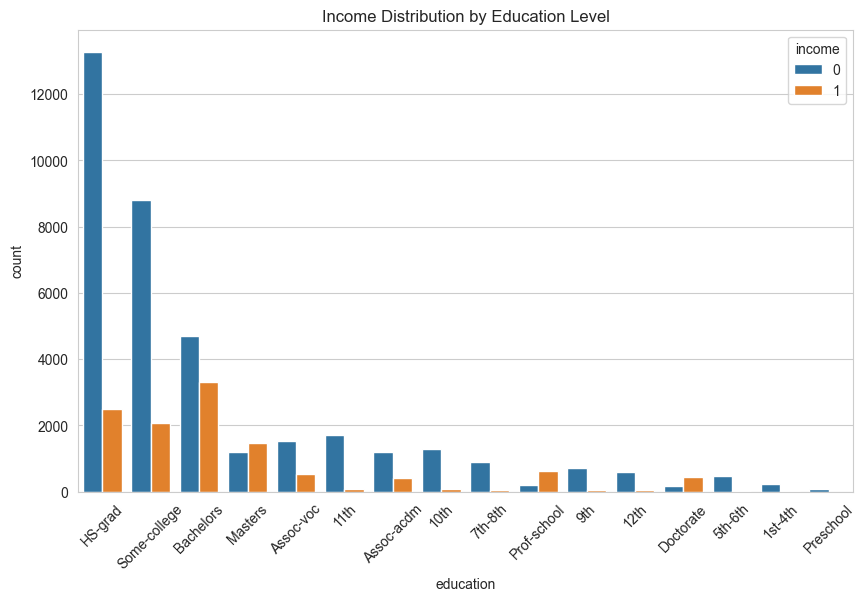


Income >50K Ratio by Education:
education
Prof-school     73.980815
Doctorate       72.558923
Masters         54.911554
Bachelors       41.283489
Assoc-acdm      25.796377
Assoc-voc       25.327511
Some-college    18.964883
HS-grad         15.857831
12th             7.305936
7th-8th          6.492147
10th             6.263499
9th              5.423280
5th-6th          5.304519
11th             5.077263
1st-4th          3.238866
Preschool        1.204819
Name: income, dtype: float64


In [6]:
# Plot income by education level
plt.figure(figsize=(10, 6))
order = df['education'].value_counts().index
sns.countplot(x='education', hue='income', data=df, order=order)
plt.title('Income Distribution by Education Level')
plt.xticks(rotation=45)
plt.show()

# Education vs income
education_income = df.groupby('education')['income'].mean().sort_values(ascending=False)*100
print("\nIncome >50K Ratio by Education:")
print(education_income)

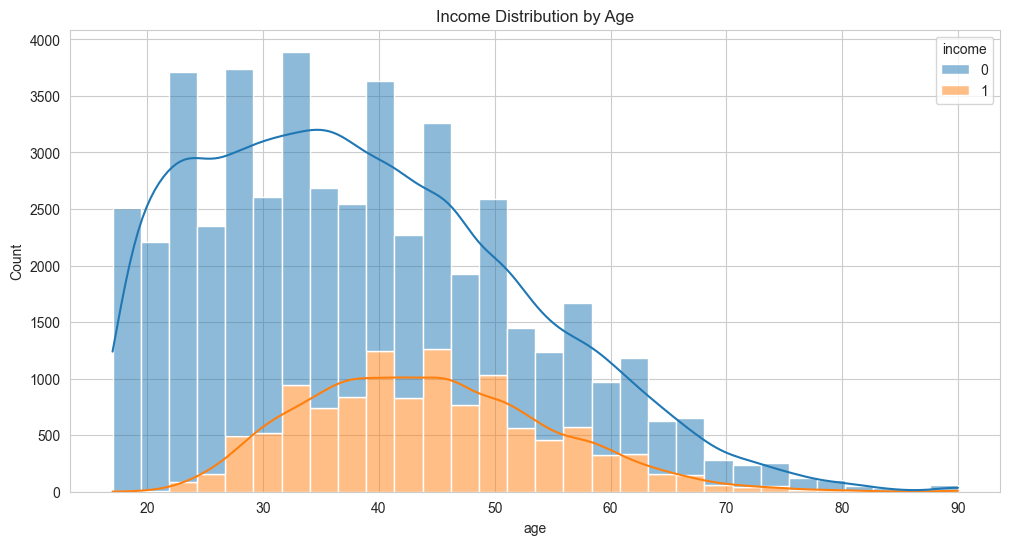


Average Age by Income:
income
0    3687.218409
1    4427.517755
Name: age, dtype: float64


In [7]:
# Plot income distribution by age
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age', hue='income', bins=30, kde=True, multiple='stack')
plt.title('Income Distribution by Age')
plt.show()

# Calculate average age by income
age_income = df.groupby('income')['age'].mean()*100
print("\nAverage Age by Income:")
print(age_income)

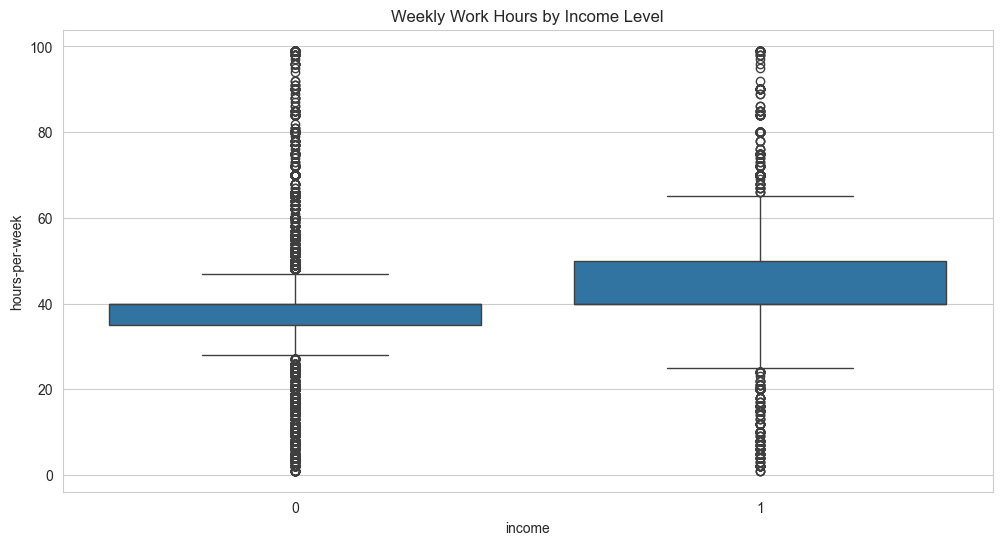


Average Weekly Work Hours by Income:
income
0    38.840048
1    45.452896
Name: hours-per-week, dtype: float64


In [8]:
# Plot income by hours per week
plt.figure(figsize=(12, 6))
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.title('Weekly Work Hours by Income Level')
plt.show()

# Calculate average work hours by income
hours_income = df.groupby('income')['hours-per-week'].mean()
print("\nAverage Weekly Work Hours by Income:")
print(hours_income)

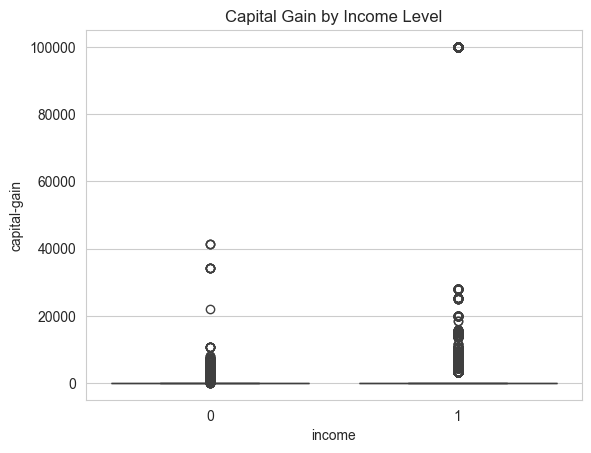

In [9]:
# Capital Gain vs Income
sns.boxplot(data=df, x='income', y='capital-gain')
plt.title('Capital Gain by Income Level')
plt.show()

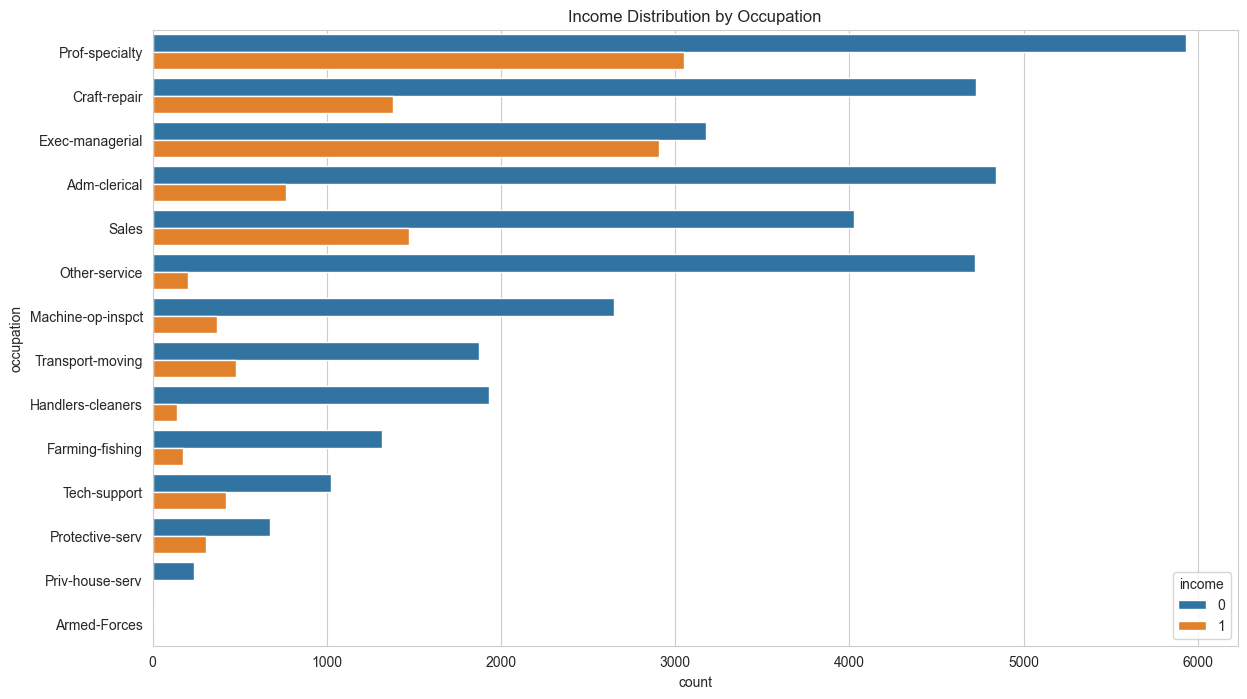


Income >50K Ratio by Occupation:
occupation
Exec-managerial      47.781794
Prof-specialty       33.949449
Armed-Forces         33.333333
Protective-serv      31.332655
Tech-support         29.045643
Sales                26.798692
Craft-repair         22.627618
Transport-moving     20.424628
Adm-clerical         13.687400
Machine-op-inspct    12.309729
Farming-fishing      11.610738
Handlers-cleaners     6.660232
Other-service         4.143815
Priv-house-serv       1.239669
Name: income, dtype: float64


In [10]:
# Plot income by occupation
plt.figure(figsize=(14, 8))
order = df['occupation'].value_counts().index
sns.countplot(y='occupation', hue='income', data=df, order=order)
plt.title('Income Distribution by Occupation')
plt.show()

# Occupation vs income
occupation_income = df.groupby('occupation')['income'].mean().sort_values(ascending=False)*100
print("\nIncome >50K Ratio by Occupation:")
print(occupation_income)

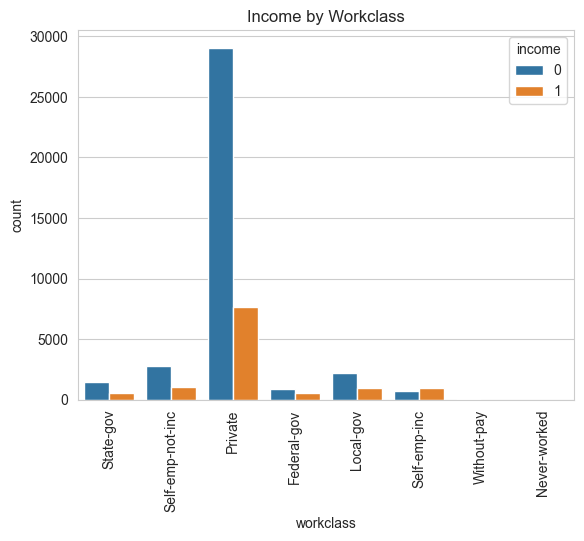

In [11]:
# Workclass vs Income
sns.countplot(data=df, x='workclass', hue='income')
plt.xticks(rotation=90)
plt.title('Income by Workclass')
plt.show()

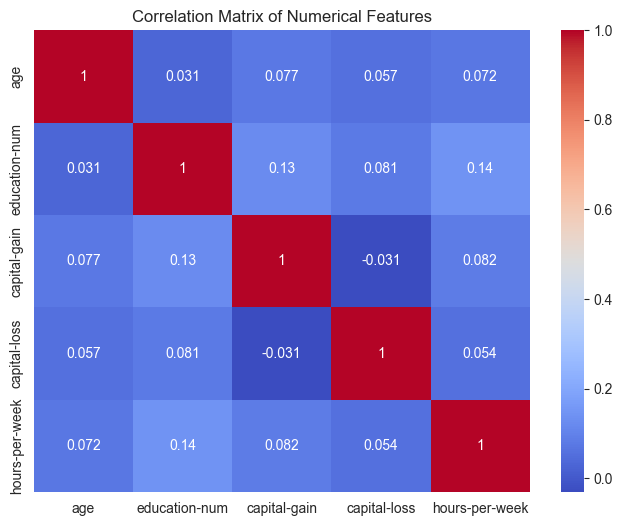

In [12]:
# Correlation matrix for numerical features
numerical_features = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## **Step 3**
### **Data Preprocessing and Feature Engineering**

In [13]:
# Verify no more missing values
df.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [14]:
# Separate features and target
X = df.drop('income', axis=1)
y = df['income']

# Split data before preprocessing to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identify categorical and numerical features
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 
                       'relationship', 'race', 'sex', 'native-country']
numerical_features = ['age', 'education-num', 'capital-gain', 'capital-loss', 
                     'hours-per-week']

# Preprocessing pipeline
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# combine the two piplines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

# define final pipeline
Pipeline(
    steps = [
        ('preprocessor', preprocessor),
        ('pca', PCA(n_components=10)),
        ]
)

# Apply preprocessing
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Get feature names after one-hot encoding
cat_features_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
all_features_names = np.concatenate([numerical_features, cat_features_names])

print("\nPreprocessed Data Shape:", X_train_preprocessed.shape)



Preprocessed Data Shape: (39073, 104)


## **Step 3**
### **Model development and evaluation**

In [64]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier(),
    'ADABOOAST': AdaBoostClassifier(),
    'XGB': XGBClassifier(scale_pos_weight=sum(y_train==0)/sum(y_train==1),  # Handle imbalance
                        eval_metric='auc',random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_preprocessed, y_train)
    y_pred = model.predict(X_test_preprocessed)
    y_prob = model.predict_proba(X_test_preprocessed)[:, 1]
    
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_prob)
    }

# Display results
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
display(results_df.sort_values(by='roc_auc', ascending=False))


Model Performance Comparison:


,accuracy,precision,recall,f1,roc_auc
XGB,0.832327,0.606254,0.854149,0.709162,0.930455
Gradient Boosting,0.868359,0.792222,0.609923,0.689222,0.923095
ADABOOAST,0.855256,0.764302,0.571429,0.653940,0.907879
Logistic Regression,0.805610,0.563165,0.837040,0.673318,0.903660
SVM,0.858942,0.764609,0.593242,0.668112,0.895343
Random Forest,0.848296,0.705177,0.629170,0.665009,0.889159
KNN,0.837240,0.679291,0.606074,0.640597,0.860874
Decision Tree,0.825059,0.638242,0.621044,0.629525,0.776792


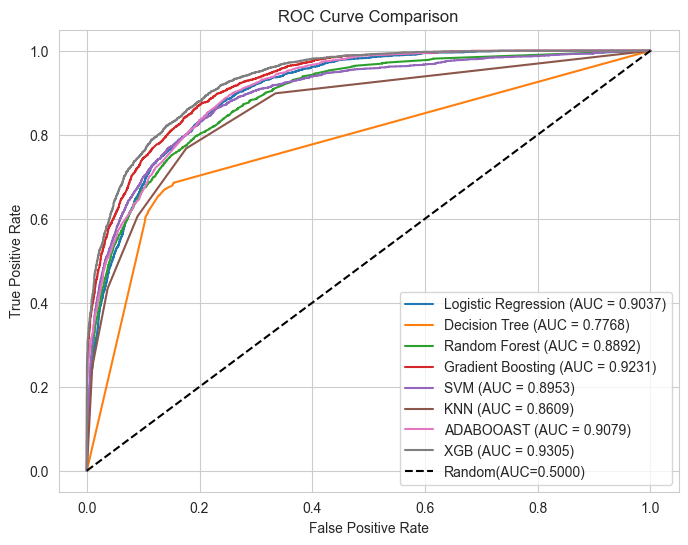

In [59]:
# ROC Curve
for name, model in models.items():
    model.fit(X_train_preprocessed, y_train)
    y_prob = model.predict_proba(X_test_preprocessed)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')

plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--', label='Random(AUC=0.5000)') #diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [83]:
# Hyperparameter tuning for XGBooast
param_dist = {
    'n_estimators': [50, 200],
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4)
}

rf = XGBClassifier(scale_pos_weight=sum(y_train==0)/sum(y_train==1),  # Handle imbalance
                   eval_metric='auc',random_state=42
                  )
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, 
                                 scoring='roc_auc', cv=5, random_state=42)
random_search.fit(X_train_preprocessed, y_train)

# Best parameters
print("\nBest Parameters for XGBooast:")
print(random_search.best_params_)

# Evaluate tuned model
best_rf = random_search.best_estimator_
y_prob_rf = best_rf.predict_proba(X_test_preprocessed)[:, 1]
y_pred_rf = (y_prob_rf > 0.57).astype(int)

print("\nXGBooast Performance After Tuning:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf, average='binary'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_rf):.4f}")


Best Parameters for XGBooast:
{'colsample_bytree': np.float64(0.7858695251758445), 'learning_rate': np.float64(0.204932104792829), 'max_depth': 4, 'n_estimators': 200, 'subsample': np.float64(0.9796582926365544)}

XGBooast Performance After Tuning:
Accuracy: 0.8485
Precision: 0.6448
Recall: 0.8169
F1 Score: 0.7208
ROC AUC: 0.9310


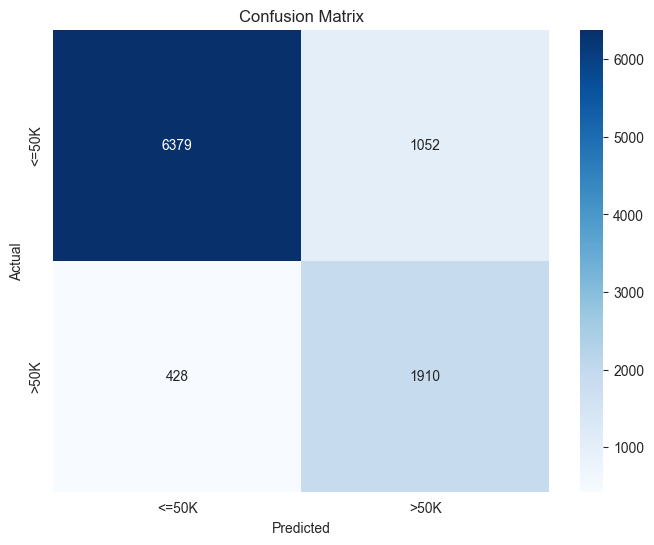

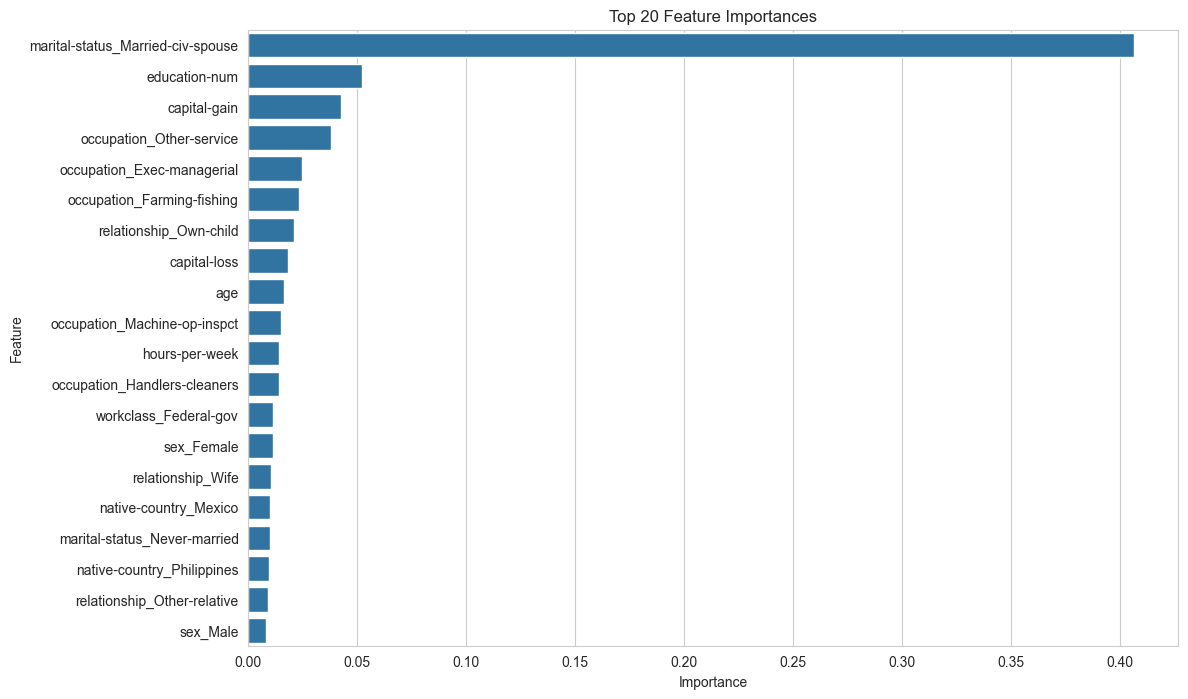

In [84]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['<=50K', '>50K'], 
            yticklabels=['<=50K', '>50K'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Feature Importance
feature_importances = best_rf.feature_importances_
importance_df = pd.DataFrame({'Feature': all_features_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Top 20 Feature Importances')
plt.show()

### **Step 5**
### **Insights and recommendations**

Key Insights from EDA:
- The dataset is imbalanced with about 76% of individuals earning <=50K and 24% earning >50k, thus Accuracy cannot be trusted.

- Higher education levels strongly correlate with higher income

- Individuals with income >50K tend to be older (average age 44) compared to those with <=50K (average age 36)

- People earning >50K work more hours per week on average (45 vs 38)

- Certain occupations like Exec-managerial and Prof-specialty have higher proportions of high earners

- Capital gains show a strong positive correlation with income level

- Married individuals tend to have higher incomes than never-married or divorced individuals

**Model Performance:**
The choice of model selection is skewed towards Recall and ROC AUC values rather than Accuracy since i'm dealing with an imbalace data whose aim is to predict whether a person's income exceeds $50K/year based on census data. The best performing model XGBooast, after tuning achieved:

- Accuracy: 0.8485

- Precision: 0.6448

- Recall: 0.8169

- F1 Score: 0.7208

- ROC AUC: 0.9310

The model performs well at distinguishing between income levels, with particularly strong performance in the ROC AUC metric. The precision-recall tradeoff could be adjusted based on business needs.

**Recommendations for Improvement:**

- **Address Class Imbalance:** Try techniques like SMOTE or class weighting to improve recall for the minority class

- **Additional Feature Engineering:** Explore more feature combinations or domain-specific features

- **Alternative Models:** Experiment with LightGMBoost or Neural Networks which might capture more complex patterns

- **More Granular Hyperparameter Tuning:** Use Bayesian optimization for more efficient hyperparameter search

- **Ensemble Methods:** Combine multiple models to potentially improve performance

- **More Data:** Collect more samples, especially for the high-income category

- **Feature Selection:** Use more sophisticated methods to select the most predictive features

**Conclusion:**
This project successfully developed a machine learning model to predict income levels from census data. The XGBooast model demonstrated strong performance, particularly in its ability to rank individuals by their likelihood of earning >50K (as shown by the high ROC AUC score and Recall, best at identifying true high income individuals). Further refinements could focus on improving recall for the high-income category while maintaining overall model performance.

In [89]:
# Save the best model and preprocessor
joblib.dump(best_rf, 'income_predictor_rf.pkl')
joblib.dump(preprocessor, 'preprocessor.pkl')

print("Model and preprocessor saved successfully.")

Model and preprocessor saved successfully.
